<a href="https://colab.research.google.com/github/mohdfaazkhan/Machine-Learning/blob/main/1_linear_regressionMachine_learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving homepricedata.txt to homepricedata (1).txt


In [ ]:
df = pd.read_csv('homepricedata.txt')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [ ]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [ ]:
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


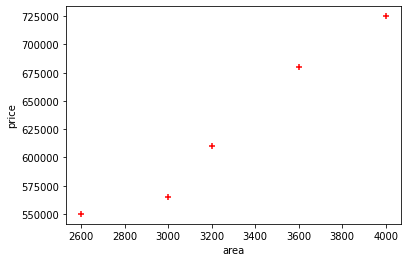

In [ ]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [ ]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [ ]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [ ]:
reg.predict([[3300]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [ ]:
3300*135.78767123 + 180616.43835616432

**(1) Predict price of a home with area = 5000 sqr ft**

In [ ]:
reg.predict([[5000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([859554.79452055])

**Generate CSV file with list of home price predictions**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
area_df = pd.read_csv("Area.txt")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [ ]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [ ]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
area_df.to_csv("prediction.csv")

In [ ]:
df= pd.read_csv("prediction.csv")
df

,Unnamed: 0,area,prices
0,0,1000,3.164041e+05
1,1,1500,3.842979e+05
2,2,2300,4.929281e+05
3,3,3540,6.613048e+05
4,4,4120,7.400616e+05
5,5,4560,7.998082e+05
6,6,5490,9.260908e+05
7,7,3460,6.504418e+05
8,8,4750,8.256079e+05
9,9,2300,4.929281e+05


**Linear Regression Practical implementation on Boston dataset**

**Life cycle of Machine learning Project**

1.Understanding the Problem Statement 2.Data Collection 3.Exploratory data analysis 4.Data Cleaning 5.Data Pre-Processing 6.Model Training 7.Choose best model

**Data Collection**

**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
boston

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [ ]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**lets prepare dataset**

In [ ]:
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**output feature adding**

In [ ]:
dataset['Price']=boston.target

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**check datatype of features in dataset**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**describe is used for statistics analysis**

In [ ]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**transpose the describe**

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**check the missing values**

In [ ]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

**relation betweeen independent and dependent feat**

In [ ]:
## EDA

In [ ]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
# we go with more 95% 

**corr visualization**

**Pairplot**

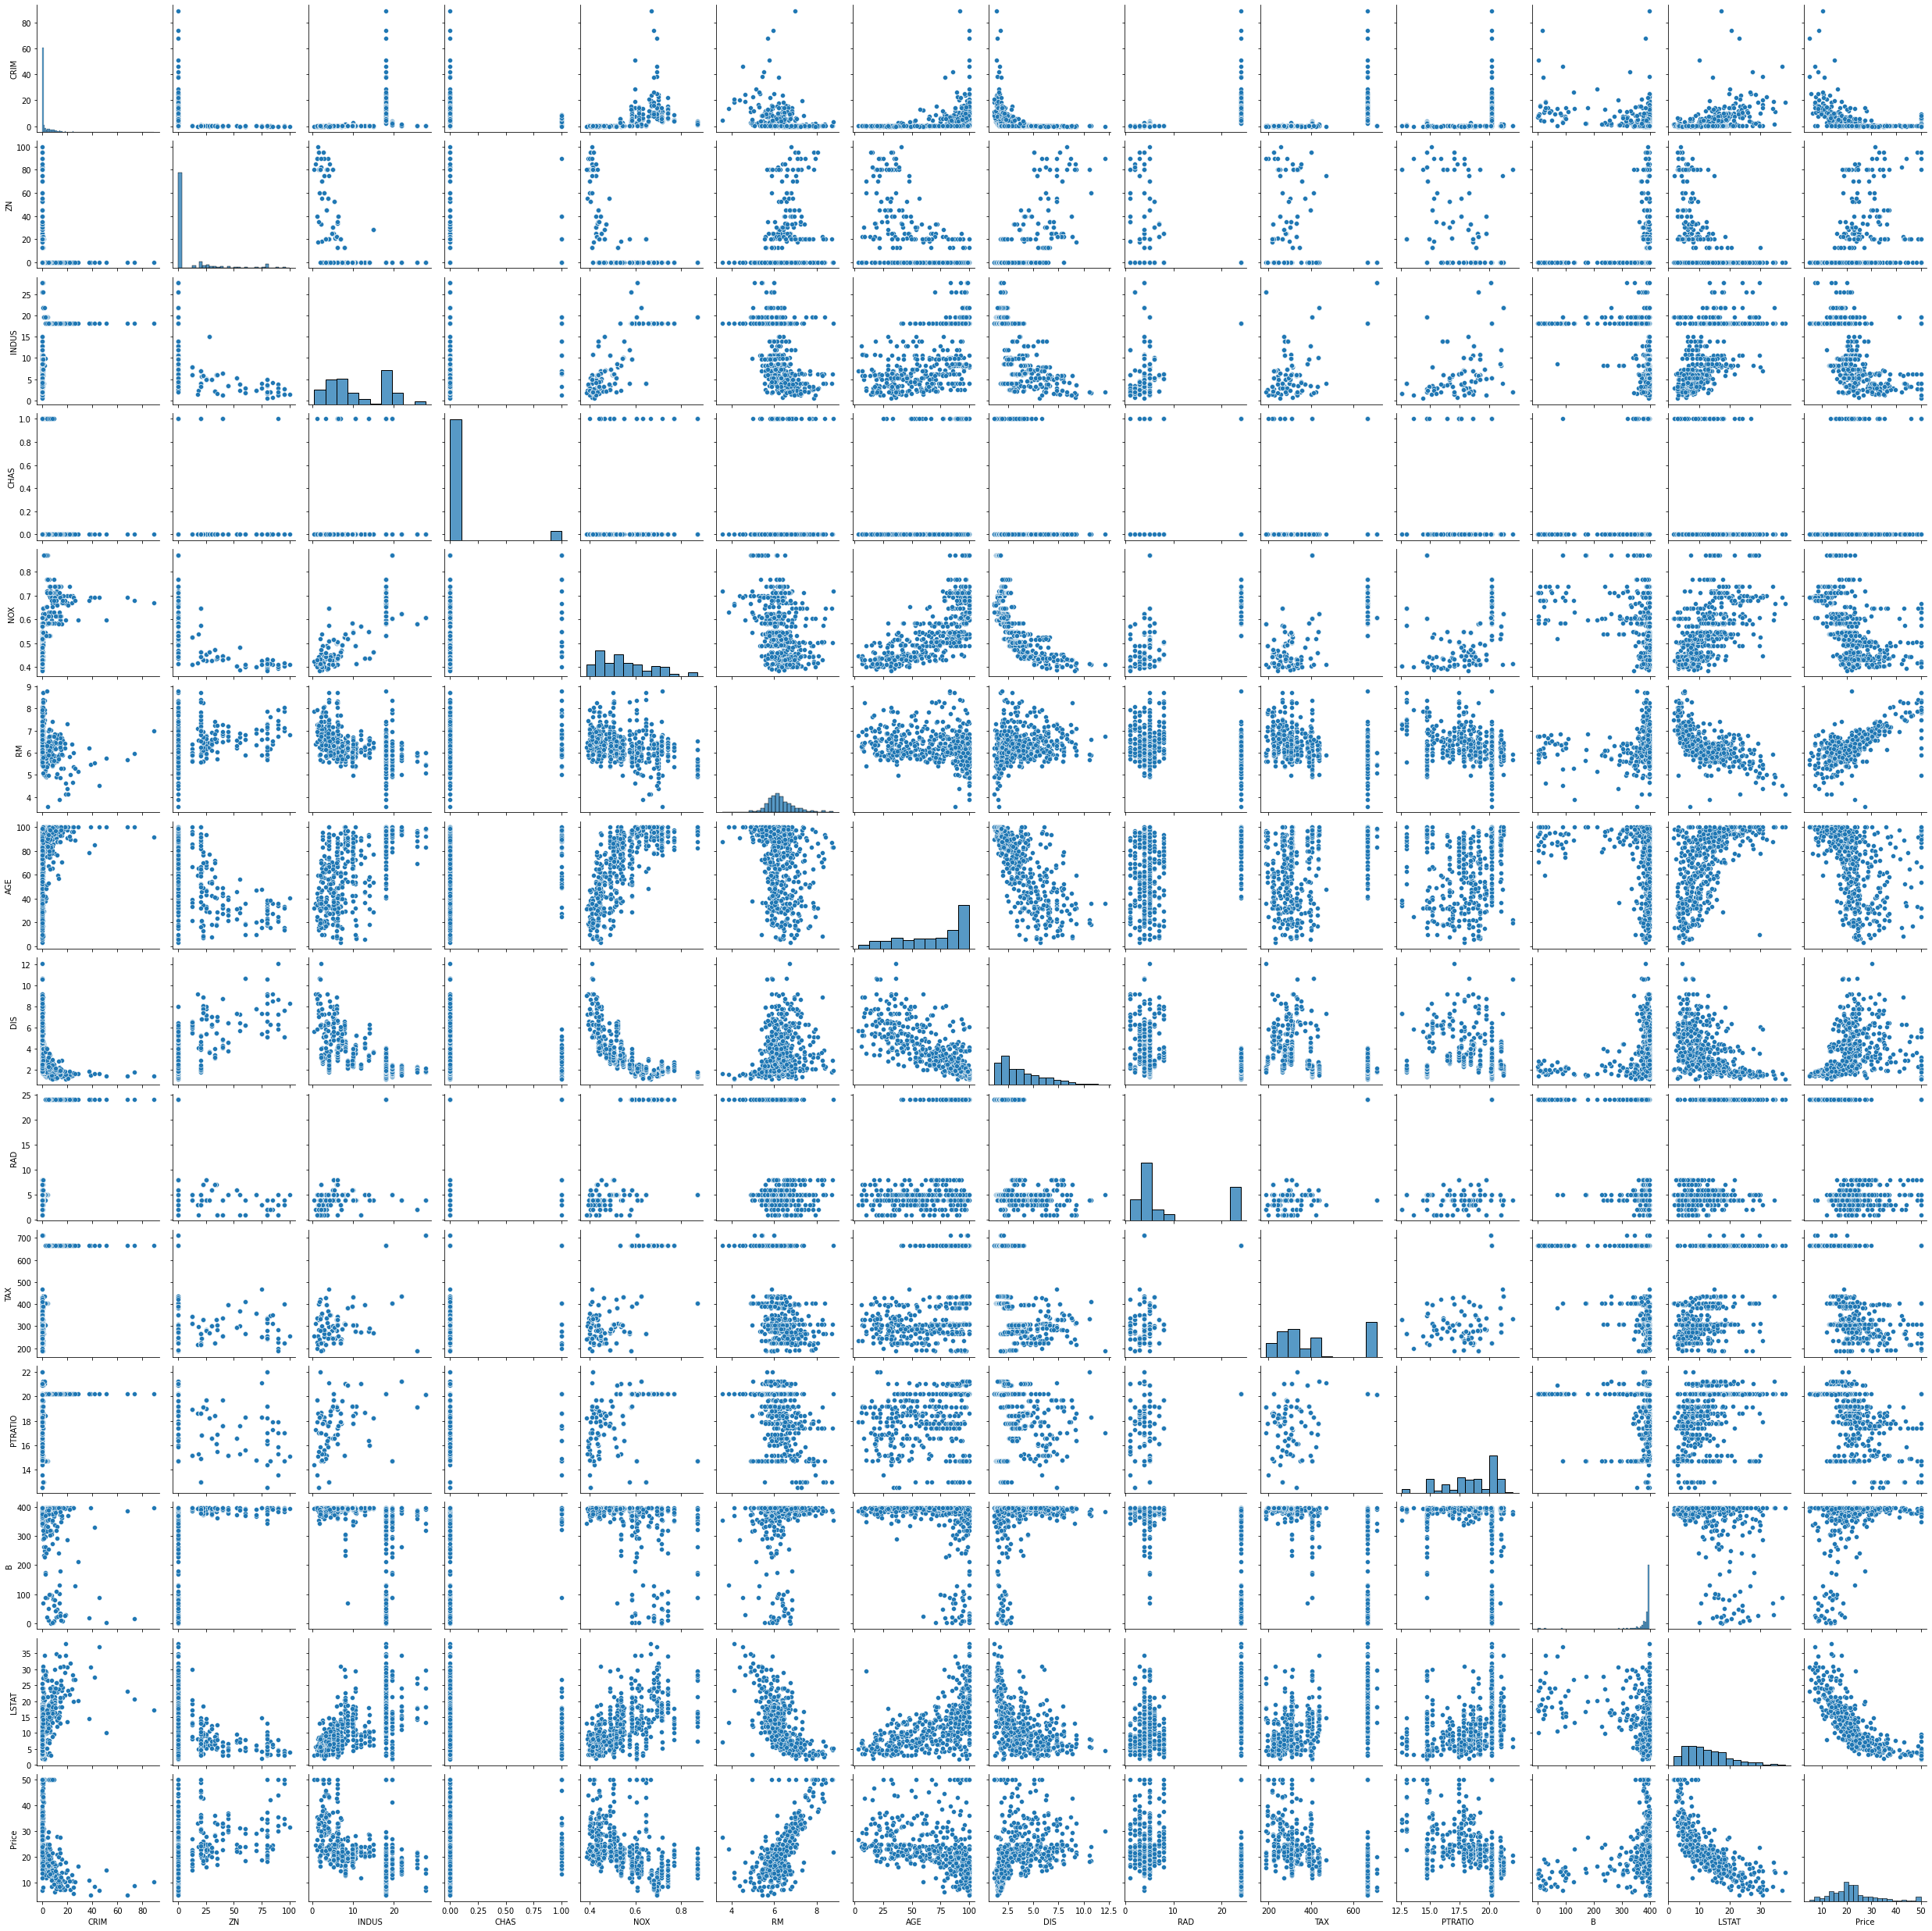

In [ ]:
import seaborn as sns
sns.pairplot(dataset)

**Heatmap**

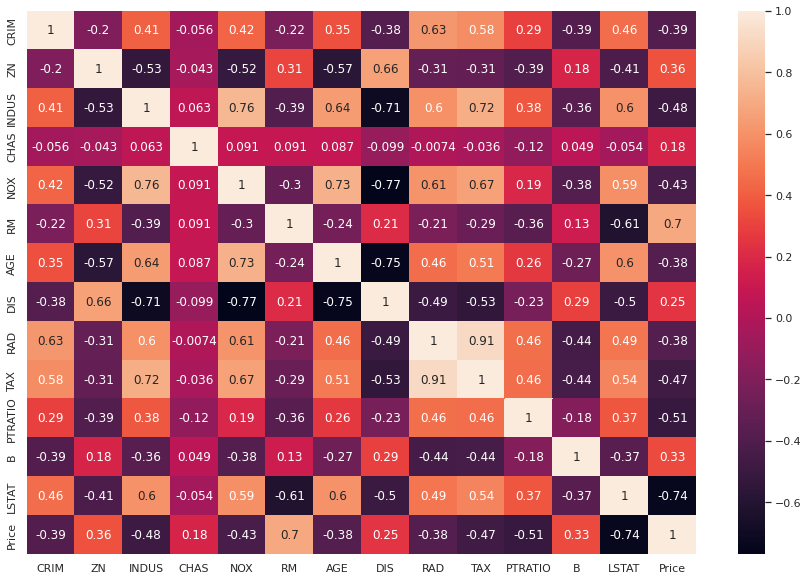

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
# price is dependent feature

**Scatter plot**

Text(0, 0.5, 'price')

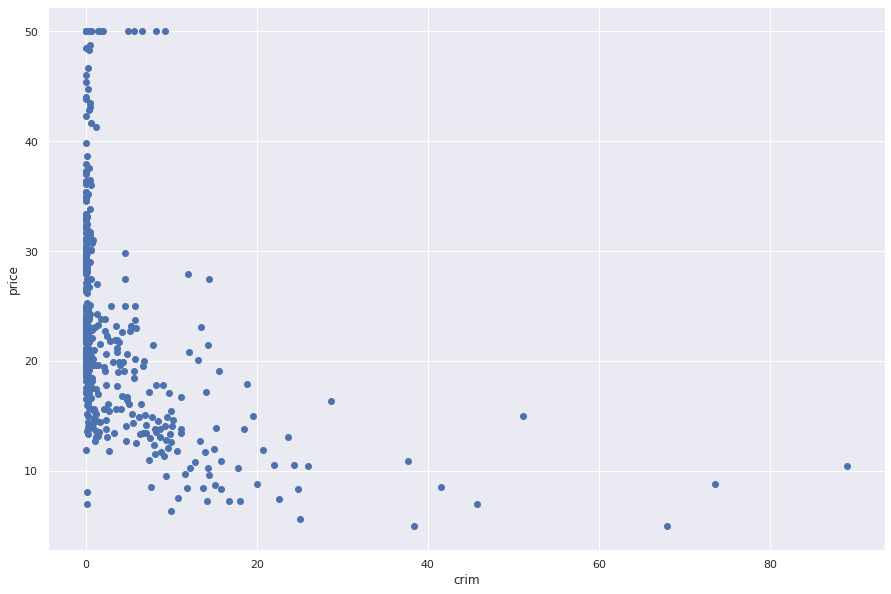

In [ ]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel("crim")
plt.ylabel("price")

Text(0, 0.5, 'price')

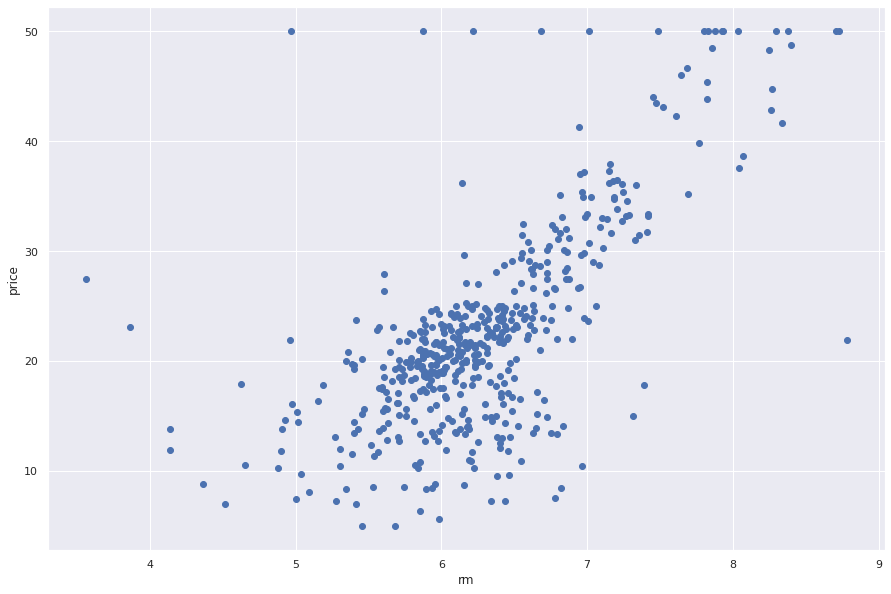

In [ ]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel("rm")
plt.ylabel("price")

**plot data in linear regression**

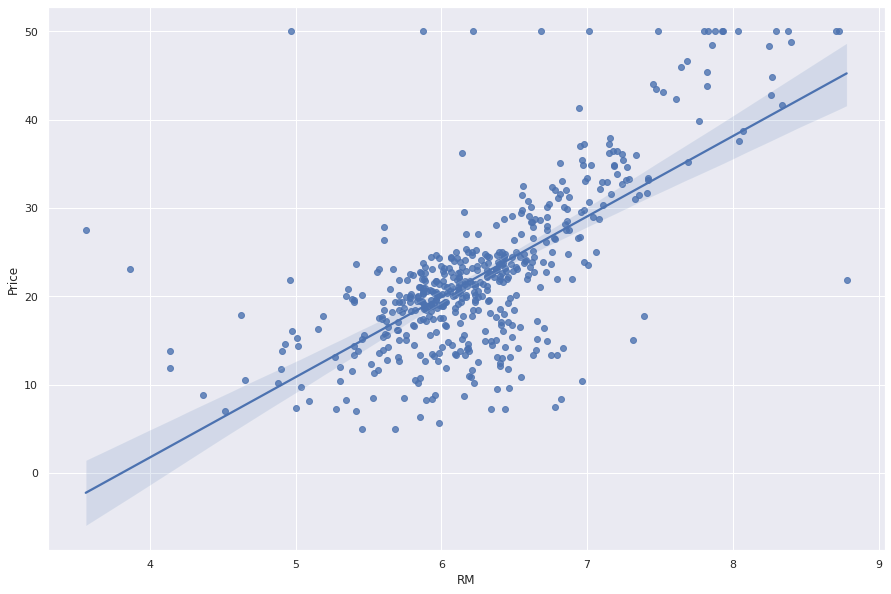

In [ ]:
sns.regplot(x="RM",y="Price",data=dataset)

In [ ]:
# shaded region  in plot  is redge and lasso
# we see more points is there not shaped mean gap
# other have 
# point is more the shade region is less
# point is less the shade region is high

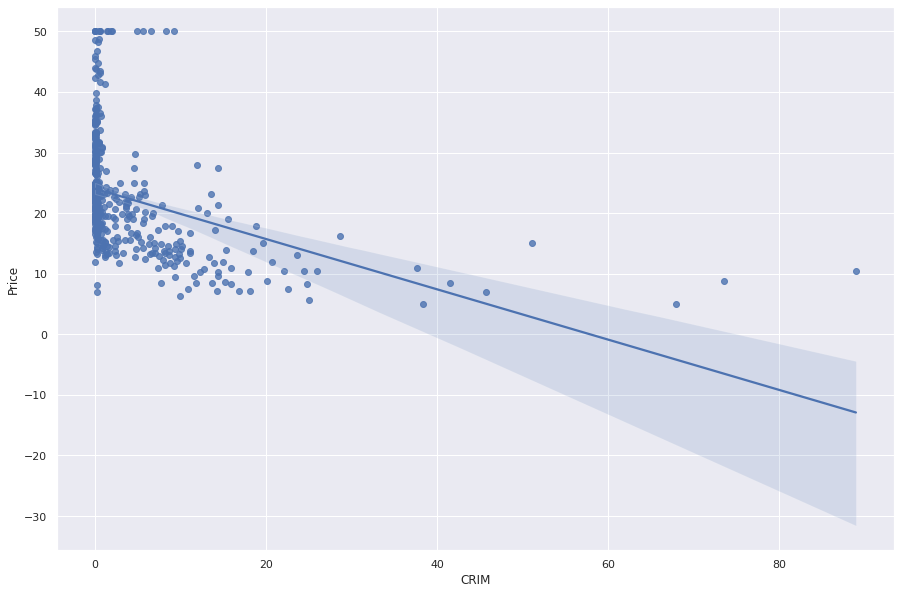

In [ ]:
sns.regplot(x="CRIM",y="Price",data=dataset)

**Boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


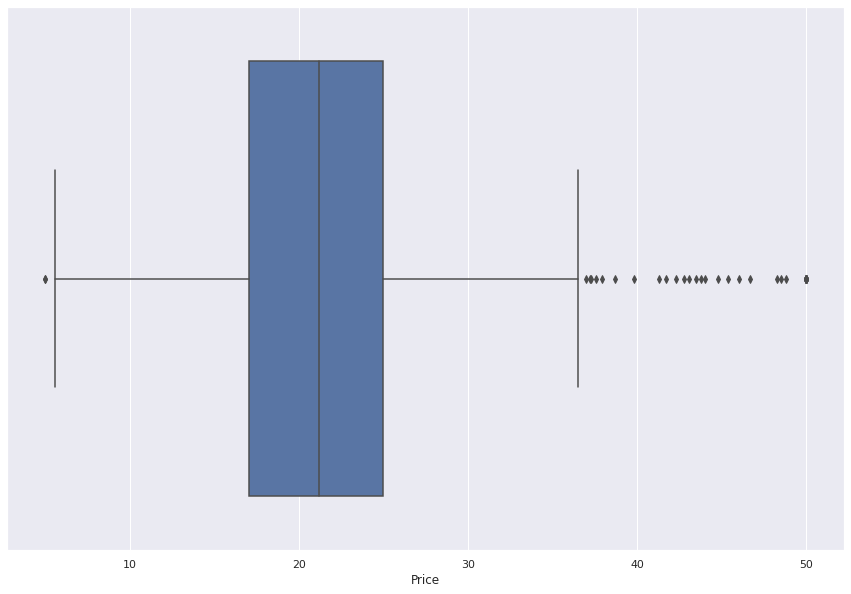

In [ ]:
sns.boxplot(dataset["Price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


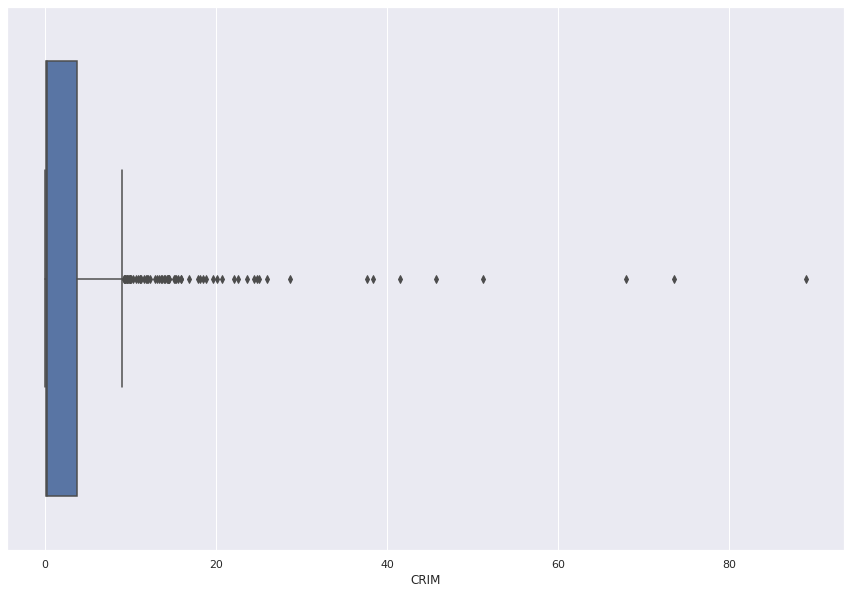

In [ ]:
sns.boxplot(dataset['CRIM'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


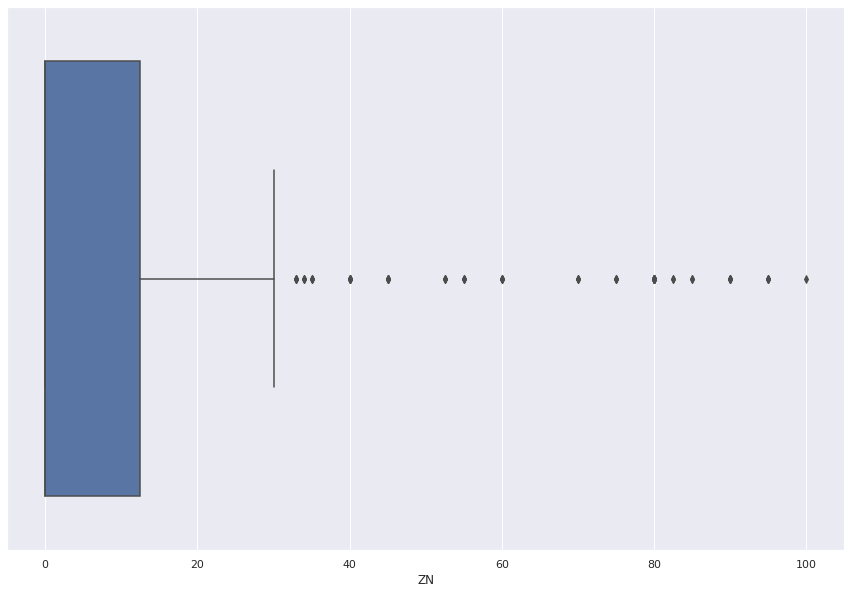

In [ ]:
sns.boxplot(dataset['ZN'])

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**independent and dependent feature seperation**

**independent col**

In [ ]:
X=dataset.iloc[:,:-1]

**dependent col**

In [ ]:
y=dataset.iloc[:,-1]

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

**spliting the data into train test split**

In [ ]:
# spliting the data into train test split
# it will return 4 different paremeters
# output feature of x train is y train and x test is y test 
# test size = 0.25   if 1000 in 25% of data 
# random state 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [ ]:
X_train.shape

(339, 13)

In [ ]:
y_train.shape

(339,)

In [ ]:
X_test.shape

(167, 13)

In [ ]:
y_test.shape

(167,)

**Standardize or featur scalling the datasets**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler

StandardScaler()

**apply data**

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
#data lekage we dont need to leak the data of test to train data
#avoid datalekage use transform
#example :
#    is eaxm paper is x_train if you get before exam is called parer lekage
# f to f' we convert mean and std in fit and transform 

In [ ]:
X_test

array([[-0.41664568,  0.87519929, -1.33277144, ..., -0.06616502,
         0.41011193, -0.56391444],
       [-0.42063267,  1.98340973, -1.22498491, ..., -1.36108953,
         0.41021798, -1.11860295],
       [-0.41894074,  2.80430634, -1.16175014, ..., -1.12985301,
         0.44765291, -1.16980497],
       ...,
       [-0.40804678,  1.36773726, -1.15169007, ..., -1.54607875,
         0.29854946, -1.18545003],
       [-0.41098494, -0.47928013,  0.19779729, ...,  0.07257689,
         0.20119741, -0.13154186],
       [-0.37856708, -0.47928013, -0.22328875, ..., -0.06616502,
         0.43482111, -0.5141347 ]])

In [ ]:
X_train

array([[-0.13641471, -0.47928013,  1.16787606, ..., -1.77731527,
         0.39261401,  2.36597873],
       [-0.41777807, -0.47928013, -1.18043314, ..., -0.75987458,
         0.14721899, -0.54115799],
       [ 1.31269177, -0.47928013,  0.95517731, ...,  0.76628645,
         0.19334986,  2.52100705],
       ...,
       [-0.13520965, -0.47928013,  0.95517731, ...,  0.76628645,
         0.17012536,  0.06331026],
       [-0.40281114, -0.47928013,  2.04022838, ...,  0.25756611,
         0.32166792,  0.27238516],
       [-0.33104058,  0.34161649, -1.07552092, ..., -2.56351944,
         0.39993132, -0.34772815]])

**Model Training**

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
regression=LinearRegression()

In [90]:
# fit data and transform
# only fir only apply 
# x trian indepe y tai n is dependent 

In [91]:
regression.fit(X_train,y_train)

LinearRegression()

**Coefficient and intercept**

In [ ]:
## print the coefficient and the intercept
## price 1 unit is increse crime is decrease relation

**coefficient**

In [92]:
print(regression.coef_)

[-1.29099218  1.60949999 -0.14031574  0.37201867 -1.76205329  2.22752218
  0.32268871 -3.31184248  2.70288107 -2.09005699 -1.7609799   1.25191514
 -3.83392028]


**Intercept**

In [93]:
print(regression.intercept_)

22.077286135693214


**prediction for the test data**

In [94]:
reg_pred = regression.predict(X_test)

In [95]:
reg_pred

array([31.43849583, 31.98794389, 30.99895559, 22.31396689, 18.89492791,
       16.21371128, 35.9881236 , 14.81264582, 25.04500847, 37.12806894,
       21.49110158, 30.88757187, 28.05752881, 34.05600093, 33.75791114,
       40.63880011, 24.24023412, 23.41351375, 25.54158122, 21.34135664,
       32.71699711, 17.88341061, 25.49549436, 25.01006418, 32.54102925,
       20.48979076, 19.48816948, 16.92733183, 38.38530857,  0.36265208,
       32.42715816, 32.15306983, 26.10323665, 23.79611814, 20.67497128,
       19.69393973,  3.50784614, 35.26259797, 27.04725425, 27.66164435,
       34.35132103, 29.83057837, 18.40939436, 31.56953795, 17.91877807,
       28.50042742, 19.49382421, 21.69553078, 38.0954563 , 16.44490081,
       24.58507284, 19.67889486, 24.53954813, 34.30610423, 26.74699088,
       34.87803562, 21.06219662, 19.87980936, 18.68725139, 24.71786624,
       19.96344041, 23.56002479, 39.57630226, 42.81994338, 30.37060855,
       17.03737245, 23.83719412,  3.2425022 , 31.5046382 , 28.63

**Assumption of linear regression**

In [96]:
## assumption of linear regression
# we used to check model is good or not
# 1.linear relation between y test and 
# 2.residuals we get normal distribution
# 3 get uniform distribution

**1.linear relationship between y_test and reg_prediction**

Text(0, 0.5, 'test predicted data')

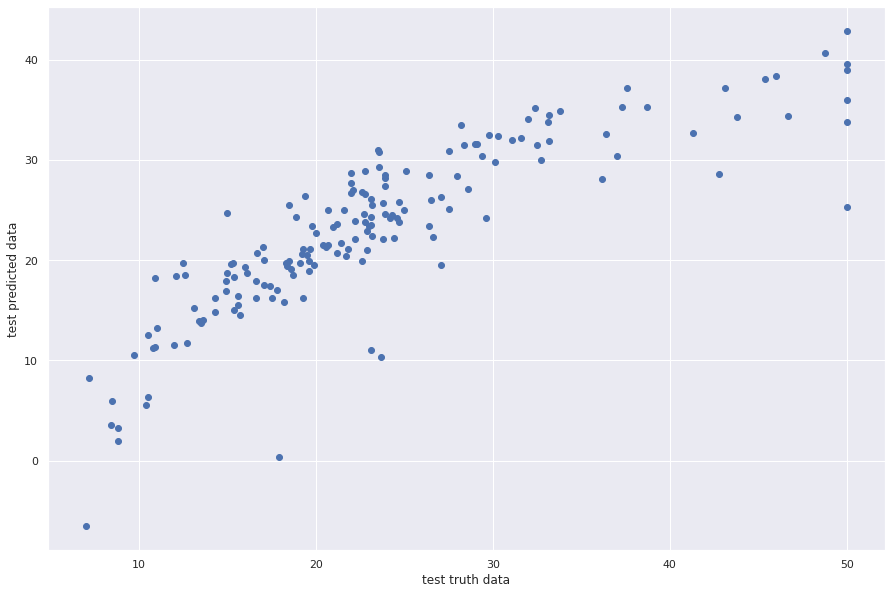

In [97]:
plt.scatter(y_test,reg_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

**2.residual we get normal distributin**

In [98]:
residuals=y_test-reg_pred
residuals

305   -3.038496
193   -0.887944
65    -7.498956
349    4.286033
151    0.705072
         ...   
442   -1.004380
451   -4.387684
188   -2.638009
76    -2.661709
314   -1.885761
Name: Price, Length: 167, dtype: float64

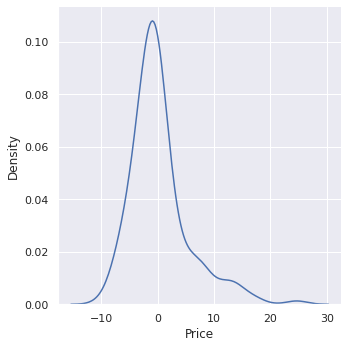

In [99]:
sns.displot(residuals,kind="kde")

**3.uniform distributin**

In [100]:
## scatter plot with prediction and residual
## uniform distribution  called below plot

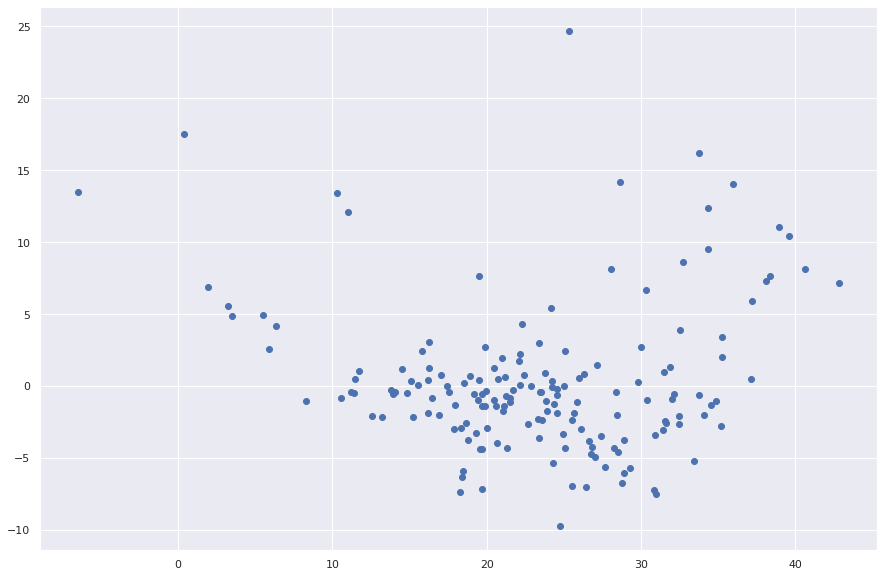

In [101]:
plt.scatter(reg_pred,residuals)

**Mean_squared_error, Mean_absolute_error**

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

27.100991709962475
3.52065852987979
5.205861284164463


**Performance metrics**

**R squared and adjusted R square**

**R squared**

In [103]:
from sklearn.metrics import r2_score
linear_score=r2_score(y_test,reg_pred)
print(linear_score)

0.7165219393967556


**Adjusted R Squared**

In [ ]:
#### adjusted R square
#### display adjusted R-squared

In [104]:
1 - (1-linear_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6924355682343883

**Ridge Regression:-**

In [105]:
# importing ridge regression from sklearn library
from sklearn.linear_model import Ridge

**Train the Model**

In [106]:
# Train the model
ridgeR = Ridge(alpha=.99)
ridgeR.fit(X_train,y_train)

Ridge(alpha=0.99)

**Coefficients and intercepts**

In [107]:
# coefficient

In [108]:
print(ridgeR.coef_)

[-1.27580076  1.5822088  -0.16122045  0.37668477 -1.72424166  2.24417936
  0.30969509 -3.26445939  2.60370907 -2.00010928 -1.75207382  1.25004819
 -3.81475273]


In [109]:
# intercepts

print(ridgeR.intercept_)

22.077286135693214


**prediction for test data**

In [110]:
ridgeR_pred = ridgeR.predict(X_test)
ridgeR_pred

array([31.33057488, 31.98187113, 30.96557336, 22.44979345, 18.93136096,
       16.21766097, 35.9695201 , 14.84502334, 25.00681679, 37.08865709,
       21.49611307, 30.86418833, 27.98870994, 33.98311439, 33.72761124,
       40.61765149, 24.27260265, 23.3396092 , 25.52874965, 21.42633474,
       32.687195  , 17.88580074, 25.50287525, 25.01789638, 32.58713523,
       20.48525253, 19.5157083 , 16.94085284, 38.35830043,  0.3359304 ,
       32.44395443, 32.10396125, 26.13535705, 23.81366531, 20.64418441,
       19.71806618,  3.56120622, 35.17406836, 27.02047743, 27.65050098,
       34.34092247, 29.77294057, 18.39839475, 31.55299939, 17.92572438,
       28.51396241, 19.49629399, 21.65556993, 38.03647563, 16.4768963 ,
       24.5632252 , 19.66078388, 24.49101977, 34.33486274, 26.74628864,
       34.83754441, 21.08503023, 19.88392682, 18.65848344, 24.71541141,
       20.00211437, 23.58561577, 39.60661267, 42.79568807, 30.35504889,
       17.07390321, 23.8441424 ,  3.23179317, 31.42616831, 28.74

**Asumptions for ridgeRegression**

**1.linear relationship between y_test and reg_prediction**

Text(0, 0.5, 'test predicted data')

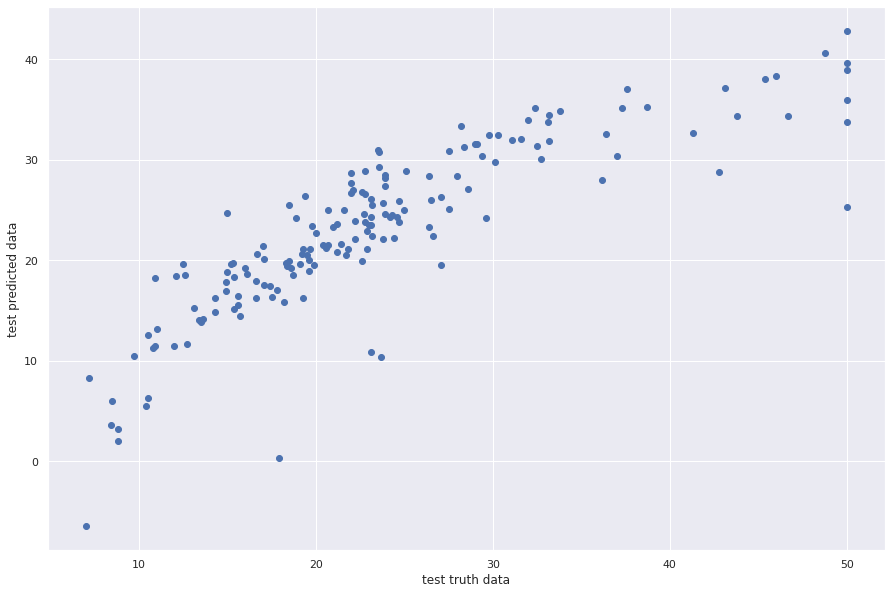

In [111]:
plt.scatter(y_test,ridgeR_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

**2.residual we get normal distributin**

In [112]:
residuals=y_test-ridgeR_pred
residuals

305   -2.930575
193   -0.881871
65    -7.465573
349    4.150207
151    0.668639
         ...   
442   -0.994611
451   -4.392029
188   -2.629588
76    -2.670899
314   -1.883786
Name: Price, Length: 167, dtype: float64

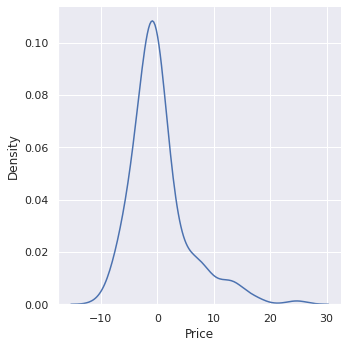

In [113]:
sns.displot(residuals,kind="kde")

**3.uniform distribution**

**scatter plot with prediction and residual**
**uniform distribution called below plot**

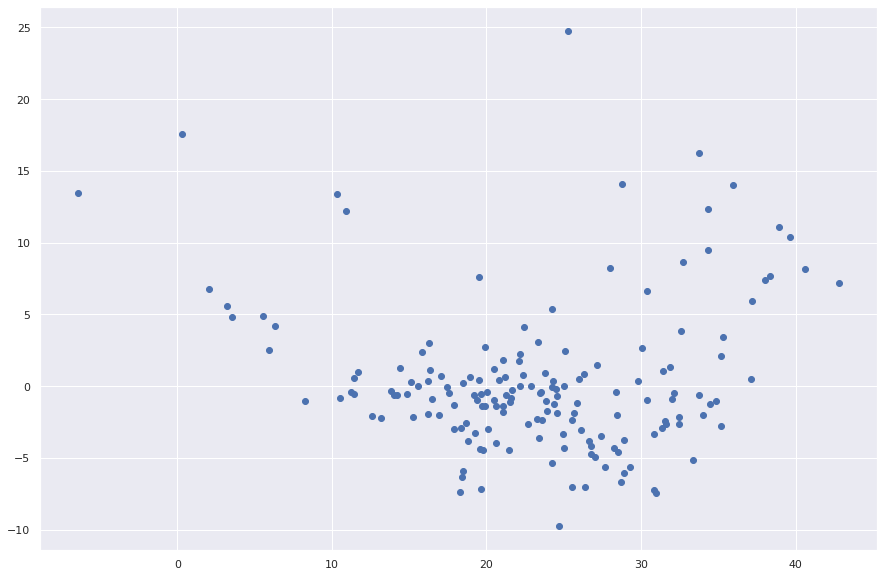

In [114]:
plt.scatter(ridgeR_pred,residuals)

**Performance Matrics**

In [115]:
# mean squared error , mean absolute error , root mean square error

In [116]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridgeR_pred))
print(mean_absolute_error(y_test,ridgeR_pred))
print(np.sqrt(mean_squared_error(y_test,ridgeR_pred)))

27.076711766488998
3.5161496353674804
5.203528780211463


**R Square**

In [117]:
from sklearn.metrics import r2_score
ridgeR_score = r2_score(y_test,ridgeR_pred)
print(ridgeR_score)

0.7167759091171657


**Adjusted R Square**

In [118]:
1 - (1-ridgeR_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6927111170813693

**Lasso Regression:-**

In [ ]:

# import lasso regression from sklearn library

In [119]:
from sklearn.linear_model import Lasso

**Train the model**

In [120]:
lasso = Lasso(alpha = 0.05)
lasso.fit(X_train,y_train)

Lasso(alpha=0.05)

**coefficient and intercept**

In [ ]:
# coefficient 

In [121]:
print(lasso.coef_)

[-1.1362951   1.39694799 -0.15032956  0.36283533 -1.44054618  2.34832732
  0.08736711 -2.99867466  1.97095926 -1.50608266 -1.68128859  1.21430748
 -3.76284248]


In [ ]:
# intercept

In [122]:
print(lasso.intercept_)

22.077286135693214


**predict lasso**

In [123]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([30.57855402, 32.04704681, 30.7836755 , 23.22473341, 19.31928679,
       16.31947881, 36.04756378, 15.14089993, 24.54690088, 36.75657835,
       21.40934745, 30.42914651, 27.51095643, 33.62846912, 33.51369108,
       40.35412747, 24.74380038, 22.64379453, 25.44641771, 21.94003238,
       32.63731951, 17.88286672, 25.46744211, 25.20808824, 32.88728015,
       20.51622533, 19.37852914, 17.08461594, 38.00682559,  0.06256954,
       32.39077209, 31.71723378, 26.30318902, 24.1901777 , 20.3564376 ,
       19.84503741,  3.86980824, 34.72575591, 27.02264842, 27.47090983,
       34.53116392, 29.31157273, 18.25916767, 31.51857148, 17.73102663,
       28.47466208, 19.54285003, 21.45175703, 37.5908217 , 16.49354151,
       24.5126893 , 19.48032315, 24.10857748, 34.59994156, 26.81233855,
       34.46731518, 21.20314923, 19.9936519 , 18.68266087, 24.75076636,
       20.37856907, 23.69939752, 39.77095878, 42.55019349, 30.379202  ,
       17.38116342, 24.21711232,  3.12416695, 30.75349905, 29.62

**Assumption of LassoRegression**

In [124]:
## assumption of linear regression
# we used to check model is good or not
# 1.linear relation between y test and 
# 2.residuals we get normal distribution
# 3 get uniform distribution

In [125]:
# 1.relationship between real data and predict data

Text(0, 0.5, 'test predicted data')

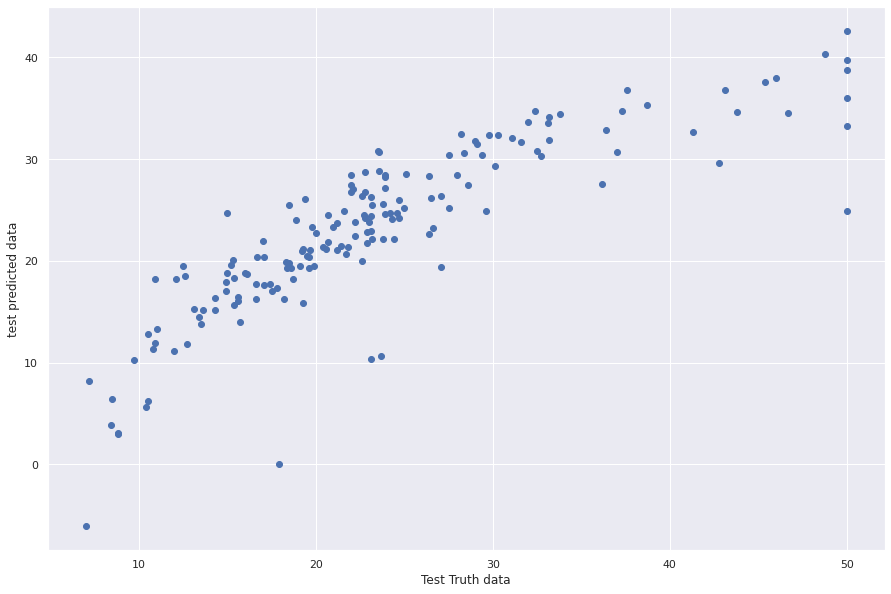

In [126]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth data")
plt.ylabel("test predicted data")

In [127]:
# 2.calculate the residual

In [128]:
residuals = y_test-lasso_pred
residuals

305   -2.178554
193   -0.947047
65    -7.283676
349    3.375267
151    0.280713
         ...   
442   -0.886966
451   -4.363615
188   -2.587938
76    -2.692050
314   -1.820302
Name: Price, Length: 167, dtype: float64

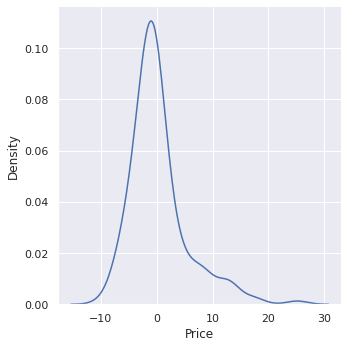

In [129]:
sns.displot(residuals,kind='kde')

In [130]:
# 3 get uniform distribution

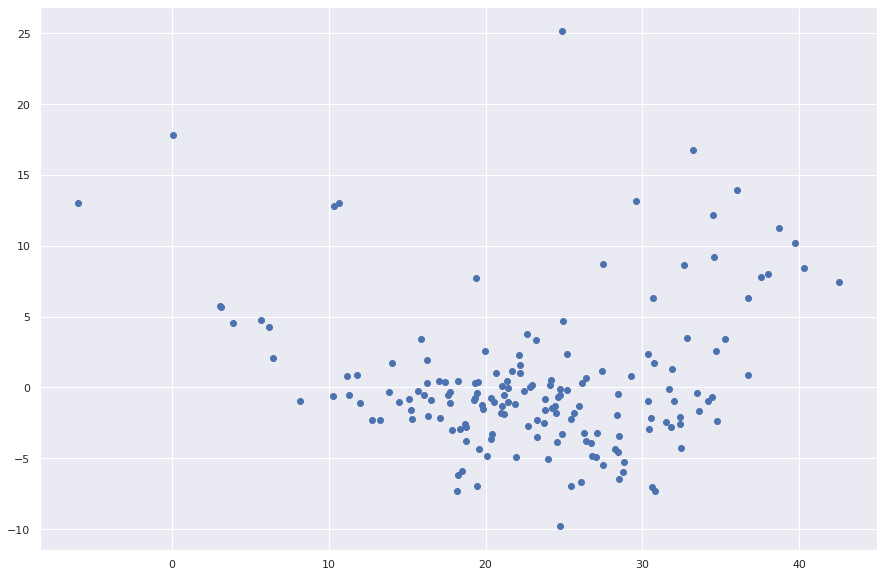

In [131]:
plt.scatter(lasso_pred,residuals)

**Performance Matrics**

In [132]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

26.891235686064327
3.4901509037901235
5.185676010518236


**R Square**

In [133]:
from sklearn.metrics import r2_score
lasso_score = r2_score(y_test,lasso_pred)
print(lasso_score)

0.7187160004662122


**Adjusted R Square**

In [134]:
1 - (1-lasso_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6948160527934066

**ElasticNet Regression**

In [ ]:
# import model

In [135]:
from sklearn.linear_model import ElasticNet

**Train the model**

In [137]:
el_net = ElasticNet(alpha=.02,l1_ratio=.2)
el_net.fit(X_train,y_train)

ElasticNet(alpha=0.02, l1_ratio=0.2)

**coefficient and intercept**

In [138]:
#coefficient

In [139]:
print(el_net.coef_)

[-1.20552262  1.46094793 -0.23215955  0.393075   -1.55138849  2.31437091
  0.24113825 -3.04649334  2.19062072 -1.64162732 -1.71126882  1.23818913
 -3.72782837]


In [140]:
# intercept

In [141]:
print(el_net.intercept_)

22.077286135693214


**prediction**

In [142]:
elastic_pred = el_net.predict(X_test)
elastic_pred

array([30.85320392, 31.95227044, 30.80930105, 23.0311917 , 19.10356298,
       16.24600244, 35.87472708, 14.9895382 , 24.82885226, 36.89115631,
       21.4886189 , 30.73150696, 27.67922031, 33.66227778, 33.58606909,
       40.49230464, 24.43871474, 23.00271234, 25.46496544, 21.7949502 ,
       32.5439557 , 17.8971736 , 25.50064893, 25.06306784, 32.76489368,
       20.48825102, 19.63035066, 17.00997366, 38.22052183,  0.23782986,
       32.49185944, 31.87233767, 26.27375723, 23.9223078 , 20.50068616,
       19.81219508,  3.81973163, 34.78789885, 26.9037553 , 27.57428463,
       34.30221555, 29.5059595 , 18.34458072, 31.47505857, 17.96071003,
       28.54751586, 19.50966375, 21.47597087, 37.76635394, 16.61030726,
       24.46653295, 19.57476414, 24.27600651, 34.43751694, 26.73386342,
       34.63692279, 21.16421431, 19.90817887, 18.5488929 , 24.69397623,
       20.16910225, 23.67112496, 39.70500876, 42.65458117, 30.27897294,
       17.23152662, 23.90157845,  3.20344734, 31.05847458, 29.26

**Assumptions of ElasticsNetRegression**

In [143]:
## assumption of linear regression
# we used to check model is good or not
# 1.linear relation between y test and predicted 
# 2.residuals we get normal distribution
# 3 get uniform distribution

In [144]:
# 1.relationship between actual y test and predicted 

Text(0, 0.5, 'test predicted data')

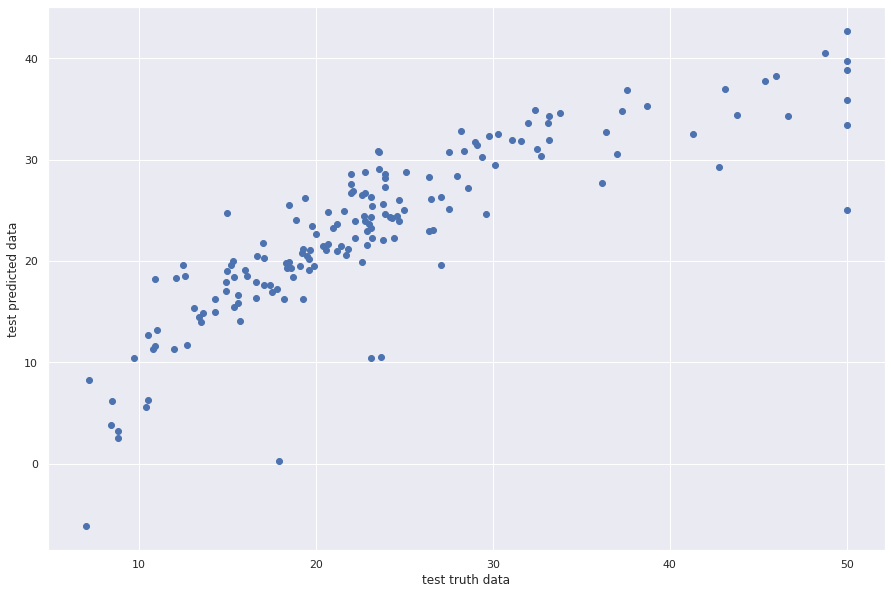

In [145]:
plt.scatter(y_test,elastic_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

In [146]:
# 2.residual

In [147]:
residuals = y_test - elastic_pred
residuals

305   -2.453204
193   -0.852270
65    -7.309301
349    3.568808
151    0.496437
         ...   
442   -0.947594
451   -4.407735
188   -2.561610
76    -2.697294
314   -1.865516
Name: Price, Length: 167, dtype: float64

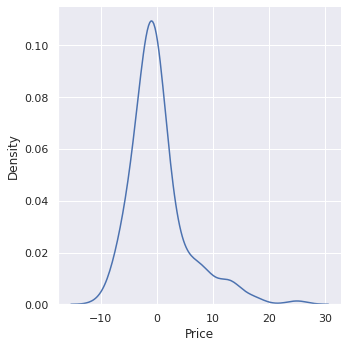

In [148]:
sns.displot(residuals,kind='kde')

In [149]:
# 3.uniform distribution

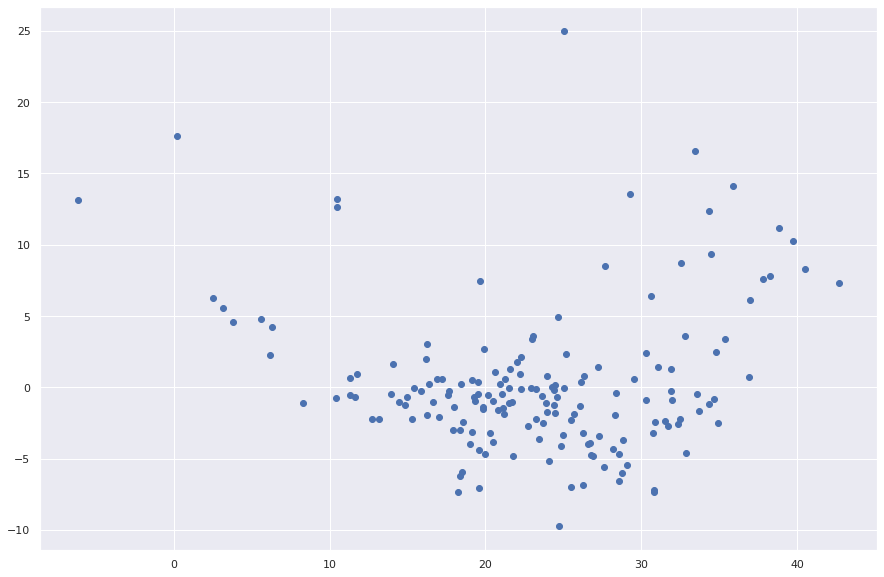

In [150]:
plt.scatter(elastic_pred,residuals)

**Performance Matrics**

In [151]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_pred))
print(mean_absolute_error(y_test,elastic_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_pred)))

27.000688509169624
3.498561559790622
5.196218674110013


**R Square**

In [152]:
from sklearn.metrics import r2_score
elastic_score = r2_score(y_test,elastic_pred)
print(elastic_score)

0.7175711171219605


**Adjusted R Square**

In [153]:
1 - (1-elastic_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.693573891779382